In [ ]:
# importando o banco de dados no google colab

from google.colab import files
uploaded= files.upload()

Saving queimadas.csv to queimadas.csv


In [ ]:
# importando pacotes para manipulaçao dos dados

import pandas as pd
import numpy as np

# importando pacotes para visualizaçao
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
import plotly.express as px

In [ ]:
# leitura dos dados e formatacao da data

df= pd.read_csv('queimadas.csv', sep= ";", encoding= 'latin1')
df.date = pd.to_datetime(df.date)
df.set_index('date',  inplace=True)
df.head()

<ipython-input-3-de3c47359a25>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.date = pd.to_datetime(df.date)


,class,focuses,uf
date,,,
2024-01-01,Desmatamento Consolidado,3,ACRE
2024-01-01,Desmatamento Consolidado,1,AMAPÁ
2024-01-01,Desmatamento Consolidado,22,AMAZONAS
2024-01-01,Desmatamento Consolidado,69,MARANHÃO
2024-01-01,Desmatamento Consolidado,274,MATO GROSSO


In [ ]:
# número de linhas e colunas

df.shape

(1977, 3)

In [ ]:
# nome das colunas

df.columns

Index(['class', 'focuses', 'uf'], dtype='object')

In [ ]:
# valores duplicados - identificaçao e exclusao

df = df.drop_duplicates(keep= 'last')
print(df)

                               class  focuses           uf
date                                                      
2024-01-01  Desmatamento Consolidado       22     AMAZONAS
2024-01-01  Desmatamento Consolidado       69     MARANHÃO
2024-01-01  Desmatamento Consolidado      274  MATO GROSSO
2024-01-01  Desmatamento Consolidado      308         PARÁ
2024-01-01  Desmatamento Consolidado       26     RONDÔNIA
...                              ...      ...          ...
2019-12-01      Vegetacao Secundaria      159     MARANHÃO
2019-12-01      Vegetacao Secundaria       10  MATO GROSSO
2019-12-01      Vegetacao Secundaria      253         PARÁ
2019-12-01      Vegetacao Secundaria        2     RONDÔNIA
2019-12-01      Vegetacao Secundaria        6    TOCANTINS

[1466 rows x 3 columns]


In [ ]:
# função para mapear os tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1466 entries, 2024-01-01 to 2019-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    1466 non-null   object
 1   focuses  1466 non-null   int64 
 2   uf       1466 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.8+ KB


In [ ]:
# estatística desccritiva dos dados

df.describe(include='all')

,class,focuses,uf
count,1466,1466.000000,1466
unique,5,NaN,9
top,Desmatamento Consolidado,NaN,PARÁ
freq,360,NaN,242
mean,NaN,311.353342,NaN
std,NaN,732.511638,NaN
min,NaN,1.000000,NaN
25%,NaN,15.000000,NaN
50%,NaN,59.500000,NaN
75%,NaN,252.250000,NaN


In [ ]:
#verificando se há valores nulos
df.isna().sum()

class      0
focuses    0
uf         0
dtype: int64

In [ ]:
# observando a maior data e a menor data

print('menor data: ', df.index.min())
print('maior data: ', df.index.max())

menor data:  2019-08-01 00:00:00
maior data:  2024-01-01 00:00:00


array([[<Axes: title={'center': 'focuses'}>]], dtype=object)

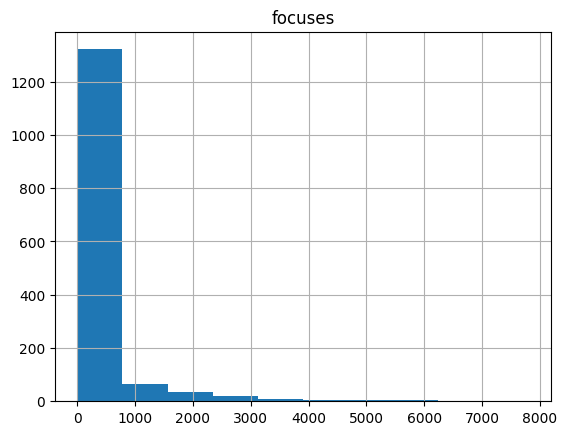

In [ ]:
# visualizaçao de um histograma simples dos dados
df.hist()

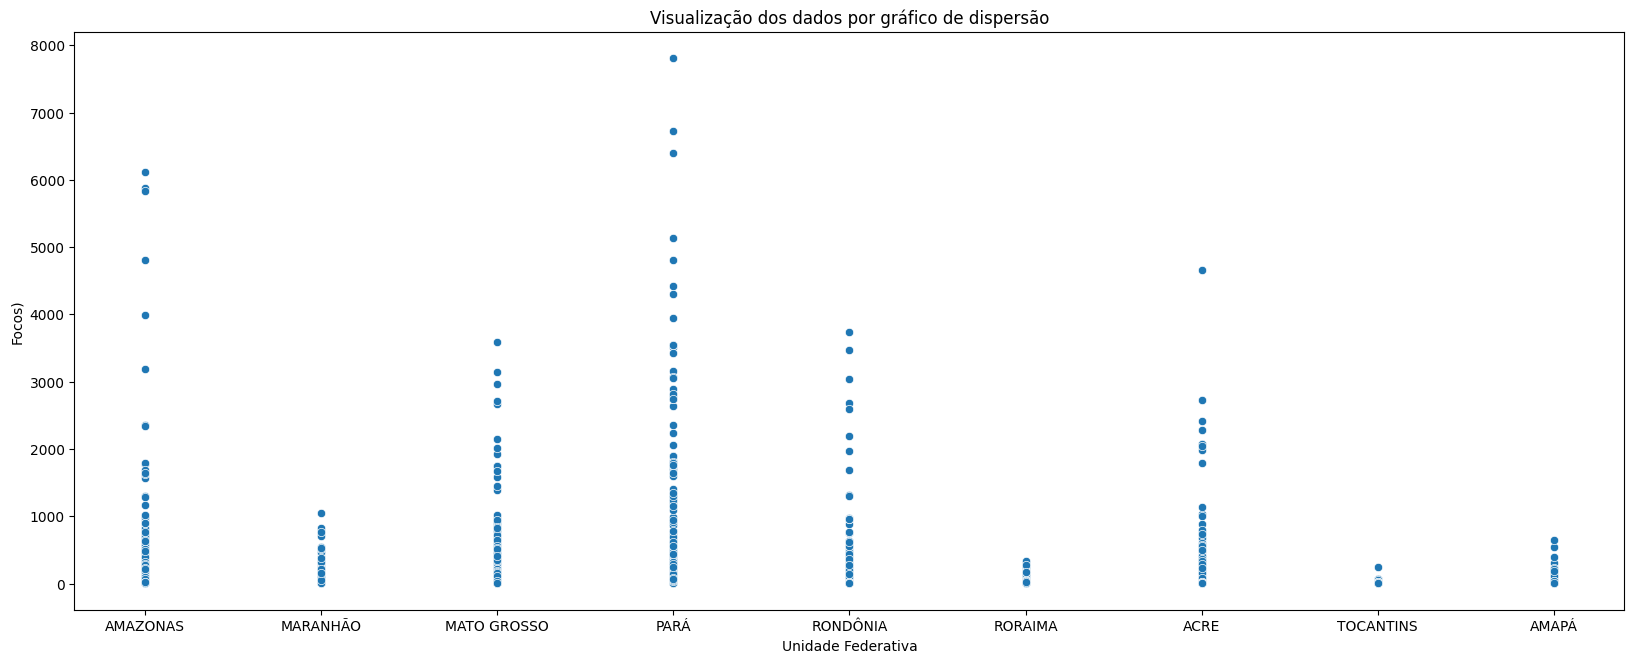

In [ ]:
# gráfico de dispersao simples para visualizaçao do conjunto de dados
plt.figure(figsize=[20, 7.5]);
sns.scatterplot(x=df['uf'], y=df['focuses']);
plt.title('Visualização dos dados por gráfico de dispersão');
plt.ylabel('Focos)');
plt.xlabel('Unidade Federativa');

In [ ]:
# renomeando as colunas da base

df.rename(columns= {'date': 'data', 'class': 'classe', 'focuses': 'foco', 'uf': 'UF' }, inplace=True)
print(df)

                              classe  foco           UF
date                                                   
2024-01-01  Desmatamento Consolidado    22     AMAZONAS
2024-01-01  Desmatamento Consolidado    69     MARANHÃO
2024-01-01  Desmatamento Consolidado   274  MATO GROSSO
2024-01-01  Desmatamento Consolidado   308         PARÁ
2024-01-01  Desmatamento Consolidado    26     RONDÔNIA
...                              ...   ...          ...
2019-12-01      Vegetacao Secundaria   159     MARANHÃO
2019-12-01      Vegetacao Secundaria    10  MATO GROSSO
2019-12-01      Vegetacao Secundaria   253         PARÁ
2019-12-01      Vegetacao Secundaria     2     RONDÔNIA
2019-12-01      Vegetacao Secundaria     6    TOCANTINS

[1466 rows x 3 columns]


<Axes: xlabel='date'>

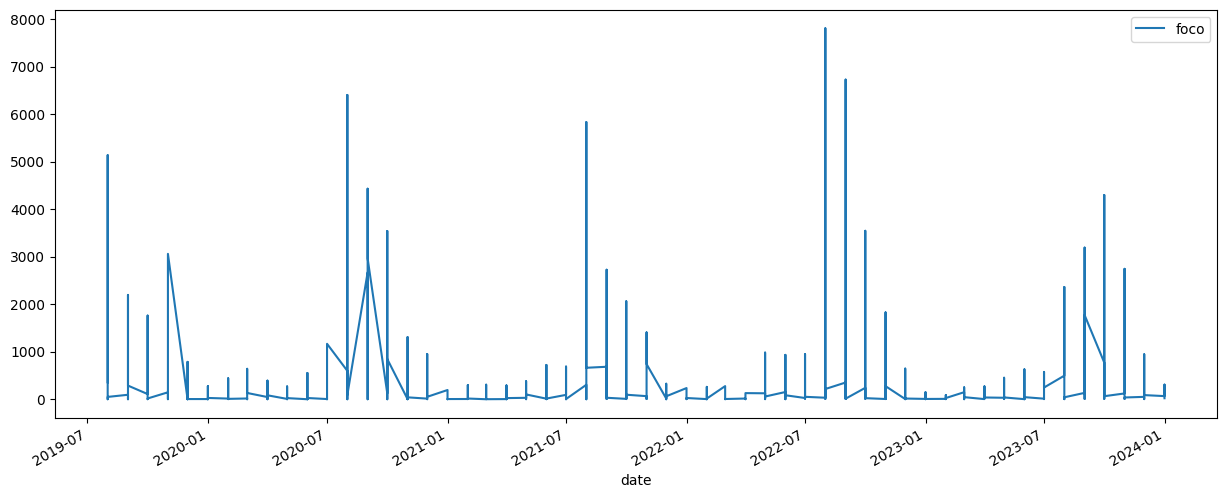

In [ ]:
#plotando series temporais

df.plot(figsize=(15,6))

In [ ]:
#media movel simples
df.foco.rolling(12).mean().head(14)

date
2024-01-01           NaN
2024-01-01           NaN
2024-01-01           NaN
2024-01-01           NaN
2024-01-01           NaN
2024-01-01           NaN
2024-01-01           NaN
2024-01-01           NaN
2024-01-01           NaN
2024-01-01           NaN
2024-01-01           NaN
2024-01-01     90.333333
2024-01-01     98.083333
2024-01-01    108.500000
Name: foco, dtype: float64

<Axes: xlabel='date'>

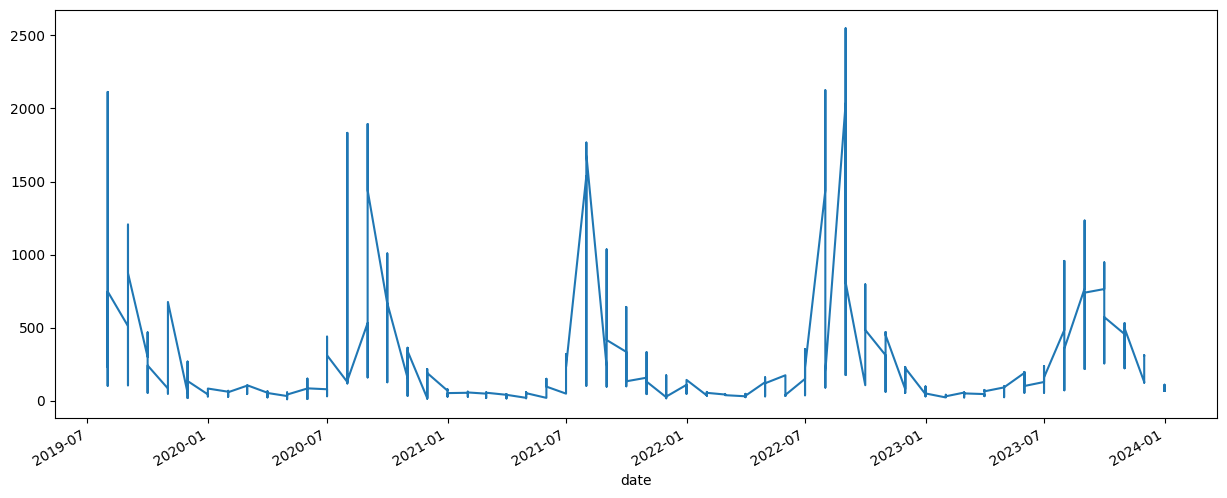

In [ ]:
#plotando a media movel acima
df.foco.rolling(12).mean().plot(figsize=(15,6))

<Axes: xlabel='date'>

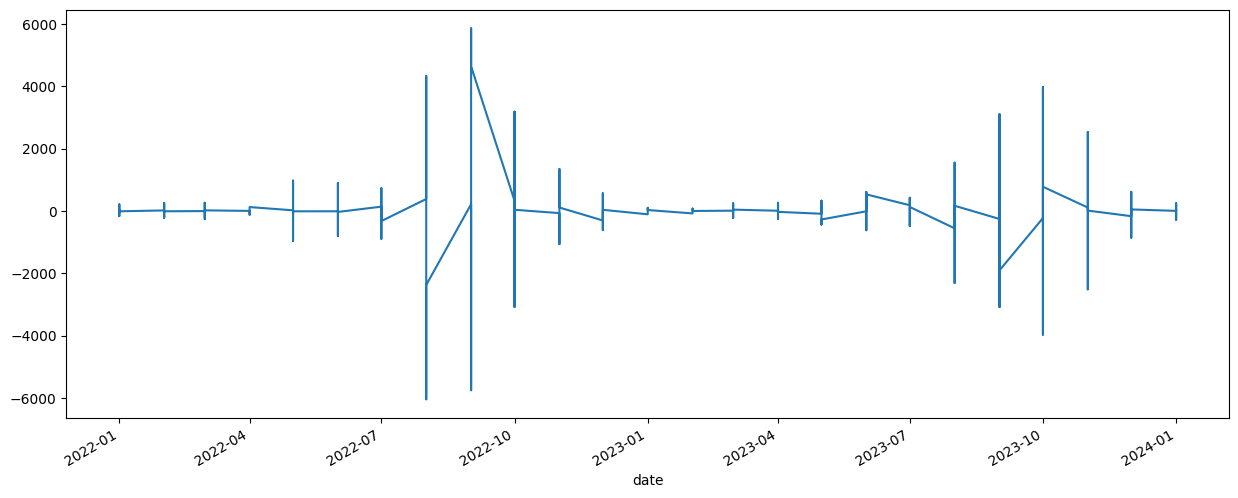

In [ ]:
# se aplicarmos um filtro para a serie não ficar tao grande, p.ex. de 2022 a 2024
filtro = (df.index.year >= 2022) & (df.index.year <= 2024)
df[filtro].foco.diff().plot(figsize=(15,6))

In [ ]:
#agrupando os focos pelos anos

df.foco.groupby(df.index.year).sum()

date
2019     73148
2020    102592
2021     73527
2022    110674
2023     94567
2024      1936
Name: foco, dtype: int64

<Axes: xlabel='date'>

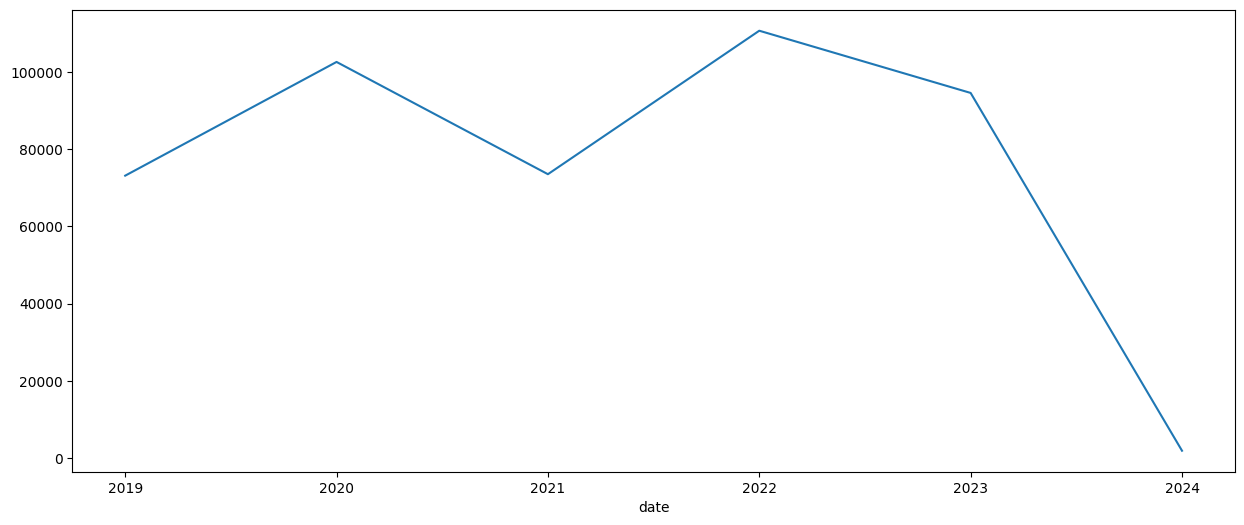

In [ ]:
#plotando os dados acima
df.foco.groupby(df.index.year).sum().plot(figsize=(15,6))

<Axes: xlabel='date'>

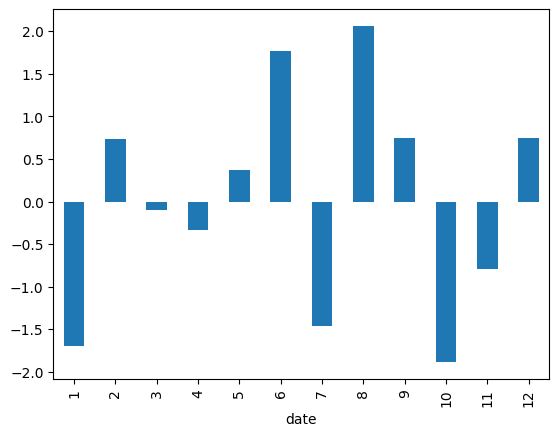

In [ ]:
#calculando a diferença media da coluna foco agrupado por mês
df.foco.diff().groupby(df.index.month).mean().plot(kind='bar')